# KerasでMnistデータを学習(全結合型NN)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.5892 - acc: 0.8555 - val_loss: 0.3409 - val_acc: 0.9099
Epoch 2/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3306 - acc: 0.9087 - val_loss: 0.3016 - val_acc: 0.9143
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3016 - acc: 0.9157 - val_loss: 0.2864 - val_acc: 0.9214
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.2884 - acc: 0.9195 - val_loss: 0.2803 - val_acc: 0.9228
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2803 - acc: 0.9217 - val_loss: 0.2748 - val_acc: 0.9237
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.2748 - acc: 0.9239 - val_loss: 0.2737 - val_acc: 0.9243
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2708 - acc: 0.9252 - val_loss: 0.2741 - val_acc

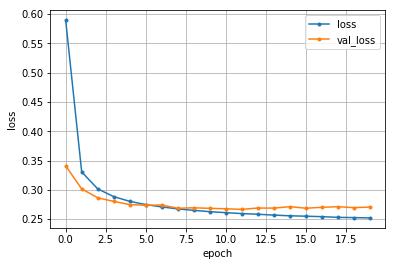

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train  = x_train.reshape(60000, 784)#トレーニングデータを60000行784列の行列に変形
x_test   = x_test.reshape(10000, 784)#テストデータを10000行784列の行列に変形
x_train  = x_train.astype('float32')#データをfloat型に変換
x_test   = x_test.astype('float32')#同上
x_train /= 255#データの範囲を0~255から0~1に変換
x_test  /= 255#同上
y_train  = keras.utils.to_categorical(y_train, 10)#答えのデータを0,1に変換
y_test   = keras.utils.to_categorical(y_test, 10)#同上

# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784,)))#入力を784次元にする
model.add(Dense(10, activation='softmax'))#出力は10次元で、それぞれsoftmax関数を損失関数とする
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 学習
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# KerasでCIFAR10を学習